In [1]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
img_array = cv2.imread("mrl/closed_eyes/s0001_00056_0_0_0_0_0_01.png", cv2.IMREAD_GRAYSCALE)

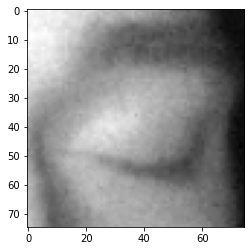

In [3]:
plt.imshow(img_array, cmap="gray")

In [4]:
shape= img_array.shape

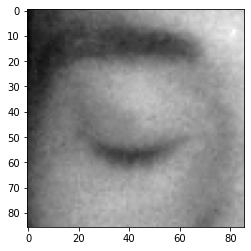

In [5]:
datadirectory = "mrl/"  #training dataset
classes = ["closed_eyes", "open_eyes"] #list of classes
for catagory in classes:
    path= os.path.join(datadirectory, catagory)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        backtorgb=cv2.cvtColor(img_array, cv2.COLOR_GRAY2RGB)
        plt.imshow(img_array, cmap='gray')
        plt.show()
        break
    break

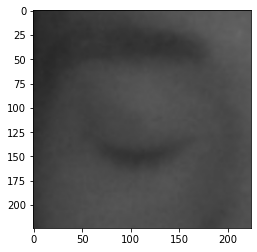

In [6]:
img_size= 224

new_array= cv2.resize(backtorgb, (img_size, img_size)) 
plt.imshow(new_array, cmap="gray") 
plt.show()

In [7]:
training_Data = []

def create_training_Data():
    for category in classes:
        path= os. path.join(datadirectory, category)
        class_num = classes. index (category) ## @ 1,
        for img in os.listdir(path):
            try: 
                img_array = cv2.imread (os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                backtorgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2RGB) 
                new_array= cv2.resize(backtorgb, (img_size, img_size)) 
                training_Data.append([new_array, class_num]) 
            except Exception as e:
                pass

In [8]:
create_training_Data()

In [9]:
print(len(training_Data))

84898


In [10]:
import random

random.shuffle(training_Data)

In [11]:
X = [] 
y = []

for features, label in training_Data:
    X.append(features) 
    y.append(label)

X = np.array(X).reshape(-1, img_size, img_size, 3)

In [12]:
X. shape

(84898, 224, 224, 3)

In [16]:
#normalize the data 
#X= X/255.0; ## we are normalizing it

In [17]:
Y= np.array(y)

In [18]:
import pickle

pickle_out= open("X.pickle","wb") 
pickle.dump(X, pickle_out) 
pickle_out.close()

pickle_out = open("y pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

#deep learning model for training - Training Learing

In [19]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout

In [20]:
model= tf.keras.applications.mobilenet.MobileNet()

In [21]:
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

Transfer learning

In [26]:
base_input= model.layers[0].input #input

In [27]:
base_output=model.layers [-4].output

In [28]:
Flat_layer= layers.Flatten()(base_output)
final_output = layers.Dense(1) (Flat_layer) # one rode (1/0)
final_output - layers.Activation ('sigmoid') (final_output)

<KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'tf.math.subtract_1')>

In [29]:
new_model= keras.Model (inputs= base_input, outputs =final_output)

In [30]:
new_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                      

In [31]:
from tensorflow.keras.callbacks import EarlyStopping

In [32]:
early_stop = EarlyStopping(monitor='val_loss',patience=1)

In [33]:
new_model.compile(loss="binary_crossentropy", optimizer= "adam", metrics=["accuracy"])

In [ ]:
new_model.fit(X,Y, batch_size=128, epochs=50, validation_split = 0.1) #training

Epoch 1/50
597/597 [==============================] - 3559s 6s/step - loss: 1.3012 - accuracy: 0.9115 - val_loss: 0.5226 - val_accuracy: 0.9649
Epoch 2/50
597/597 [==============================] - 3559s 6s/step - loss: 0.8367 - accuracy: 0.9430 - val_loss: 0.3438 - val_accuracy: 0.9760
Epoch 3/50
597/597 [==============================] - 3563s 6s/step - loss: 0.8318 - accuracy: 0.9426 - val_loss: 1.0338 - val_accuracy: 0.9282
Epoch 4/50
597/597 [==============================] - 3415s 6s/step - loss: 0.7712 - accuracy: 0.9472 - val_loss: 0.4408 - val_accuracy: 0.9706
Epoch 5/50
597/597 [==============================] - 3420s 6s/step - loss: 0.8865 - accuracy: 0.9403 - val_loss: 0.3259 - val_accuracy: 0.9776
Epoch 6/50
597/597 [==============================] - 3413s 6s/step - loss: 0.4814 - accuracy: 0.9673 - val_loss: 0.8370 - val_accuracy: 0.9439
Epoch 7/50
597/597 [==============================] - 3420s 6s/step - loss: 3.2422 - accuracy: 0.7803 - val_loss: 7.5258 - val_accuracy:

In [ ]:
new_model.save('my_model_Drowsiness2.h5')

In [ ]:
#new_model = tf.keras.models.load_model("my_model_Drowsiness.h5")

checking the network for predictions

In [ ]:
img_array = cv2.imread('s0001_00167_0_0_0_0_0_01.png', cv2.IMREAD_GRAYSCALE) 
backtorgb= cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
new_array= cv2.resize(backtorgb, (img_size, img_size))

In [ ]:
X_input = np.array(new_array).reshape(1, img_size, img_size, 3)

In [ ]:
X_input.shape

In [ ]:
plt.imshow(new_array)

In [ ]:
X_input=X_input/255.0

In [ ]:
prediction=new_model.predict(X_input)

In [ ]:
prediction